# Recap from Lecture 29 on using Pandas

## Import Excel table as Pandas DataFrame object

In [2]:
import pandas as pd
xls = pd.ExcelFile('Lecture30_data/titanic3.xls')
sheet_1 = xls.parse(0)
sheet_1

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


## Side-track: Counter class (a subclass of dictionary)

Counter is a subclass of Dictionary class that we are more familiar with. It provides faster way to tally distinct values and saved the results as a dictionary. 

In [3]:
from collections import Counter
c = Counter('baracadabra')
print(c)
d = c.most_common(3)
print(d)

Counter({'a': 5, 'b': 2, 'r': 2, 'c': 1, 'd': 1})
[('a', 5), ('b', 2), ('r', 2)]


We want the Counter to return a dictionary subclass with key as the values of "survived" (i.e., either 0 or 1) and values as the number of passengers who have the value.

In [4]:
counter = Counter(sheet_1.loc[sheet_1["body"].notna(), "survived"].values)
print(counter)

Counter({0: 121})


This means that all of the passengers who have non NA 'body' value have 'survived' value equal to 0 (means that they did not survive), which obviously makes sense.

## Count the number of passengers who have non-NaN values in each input variable

In [5]:
print(sheet_1.shape)
sheet_1.count()

(1309, 14)


pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

We now want ot obtain all of the columns with no missing information

In [6]:
criteria = sheet_1.count() == sheet_1.shape[0]
data = sheet_1[criteria.index[criteria]]
data=data.drop(['name','ticket'],axis=1)
data

,pclass,survived,sex,sibsp,parch
0,1,1,female,0,0
1,1,1,male,1,2
2,1,0,female,1,2
3,1,0,male,1,2
4,1,0,female,1,2
5,1,1,male,0,0
6,1,1,female,1,0
7,1,0,male,0,0
8,1,1,female,2,0
9,1,0,male,0,0


In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data.loc[0:data.shape[0],'sex'] = le.fit_transform(data.sex)
data

,pclass,survived,sex,sibsp,parch
0,1,1,0,0,0
1,1,1,1,1,2
2,1,0,0,1,2
3,1,0,1,1,2
4,1,0,0,1,2
5,1,1,1,0,0
6,1,1,0,1,0
7,1,0,1,0,0
8,1,1,0,2,0
9,1,0,1,0,0


## Split data into training and test

In [8]:
from sklearn import model_selection
X = data.drop(["survived"], axis=1).values
y = data["survived"].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2, shuffle=True)

## Training classifier 

In [9]:
from sklearn.linear_model import LogisticRegression
logitreg = LogisticRegression(solver='liblinear')
fit = logitreg.fit(X_train, y_train)

## Get predicted probabilities

First column contains the probabilities for non-survived

Second column contains the probabilities for survived 

In each row, the two probabilities should sum to one

In [11]:
y_test_prob = fit.predict_proba(X_test)
y_test_prob

array([[0.90462372, 0.09537628],
       [0.58568343, 0.41431657],
       [0.22800989, 0.77199011],
       [0.90462372, 0.09537628],
       [0.90462372, 0.09537628],
       [0.10709142, 0.89290858],
       [0.45952676, 0.54047324],
       [0.79387946, 0.20612054],
       [0.921349  , 0.078651  ],
       [0.12901772, 0.87098228],
       [0.87308695, 0.12691305],
       [0.44589732, 0.55410268],
       [0.45952676, 0.54047324],
       [0.40772517, 0.59227483],
       [0.58931   , 0.41069   ],
       [0.88478652, 0.11521348],
       [0.88478652, 0.11521348],
       [0.94417365, 0.05582635],
       [0.88478652, 0.11521348],
       [0.58568343, 0.41431657],
       [0.88478652, 0.11521348],
       [0.88478652, 0.11521348],
       [0.76716188, 0.23283812],
       [0.76716188, 0.23283812],
       [0.76716188, 0.23283812],
       [0.39451066, 0.60548934],
       [0.89977037, 0.10022963],
       [0.40772517, 0.59227483],
       [0.88478652, 0.11521348],
       [0.11246678, 0.88753322],
       [0.

To check our predictions, add probabilities for survied (i.e., 2nd column) to the testing data together with the true survived label

In [95]:
pred = y_test_prob[:,[1]]

true_label = y_test.reshape((y_test.shape[0], 1))

testdata=np.append(X_test, pred, axis=1)

testdata=np.append(testdata, true_label, axis=1)

testdata_df = pd.DataFrame(testdata, columns=['pclass', 'sex', 'sibsp', 'parch', 'pred_prob', 'true_label'])

testdata_df

,pclass,sex,sibsp,parch,pred_prob,true_label
0,3.0,1.0,1.0,0.0,0.095376,0.0
1,1.0,1.0,0.0,0.0,0.414317,1.0
2,2.0,0.0,0.0,0.0,0.771990,1.0
3,3.0,1.0,1.0,0.0,0.095376,1.0
4,3.0,1.0,1.0,0.0,0.095376,0.0
5,1.0,0.0,0.0,1.0,0.892909,1.0
6,3.0,0.0,1.0,0.0,0.540473,1.0
7,2.0,1.0,1.0,1.0,0.206121,0.0
8,3.0,1.0,2.0,0.0,0.078651,0.0
9,1.0,0.0,1.0,1.0,0.870982,1.0


In [103]:
print(testdata_df.iloc[0:10].to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
 pclass &  sex &  sibsp &  parch &  pred\_prob &  true\_label \\
\midrule
    3.0 &  1.0 &    1.0 &    0.0 &   0.095376 &         0.0 \\
    1.0 &  1.0 &    0.0 &    0.0 &   0.414317 &         1.0 \\
    2.0 &  0.0 &    0.0 &    0.0 &   0.771990 &         1.0 \\
    3.0 &  1.0 &    1.0 &    0.0 &   0.095376 &         1.0 \\
    3.0 &  1.0 &    1.0 &    0.0 &   0.095376 &         0.0 \\
    1.0 &  0.0 &    0.0 &    1.0 &   0.892909 &         1.0 \\
    3.0 &  0.0 &    1.0 &    0.0 &   0.540473 &         1.0 \\
    2.0 &  1.0 &    1.0 &    1.0 &   0.206121 &         0.0 \\
    3.0 &  1.0 &    2.0 &    0.0 &   0.078651 &         0.0 \\
    1.0 &  0.0 &    1.0 &    1.0 &   0.870982 &         1.0 \\
\bottomrule
\end{tabular}



### Receiver Operator Characteristic (ROC) curve

Often we don't want to set a single threshold but rather evaluate the model based on all thresholds. ROC is the a way to this.

At each threshold, it calculates two rates:

True Positive Rate = True Positives / (True Positives + False Negatives)

False Positive Rate = False Positives / (False Positives + True Negatives)

In [138]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# calculate AUC
probs = y_test_prob[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)

roc_table = np.append(tpr.reshape((tpr.shape[0], 1)),
 fpr.reshape((fpr.shape[0], 1)), axis=1)
roc_table = np.append(roc_table, thresholds.reshape((thresholds.shape[0], 1)), axis=1)

roc_df = pd.DataFrame(roc_table, columns=['TPR', 'FPR', 'Threshold'])

roc_df

AUC: 0.809


,TPR,FPR,Threshold
0,0.000000,0.000000,1.898057
1,0.010417,0.000000,0.898057
2,0.052083,0.000000,0.892909
3,0.062500,0.000000,0.888421
4,0.156250,0.006024,0.887533
5,0.156250,0.012048,0.877039
6,0.177083,0.012048,0.870982
7,0.270833,0.012048,0.864673
8,0.291667,0.012048,0.852401
9,0.302083,0.012048,0.838015


In [143]:
print(roc_df.to_latex(index=False))

\begin{tabular}{rrr}
\toprule
      TPR &       FPR &  Threshold \\
\midrule
 0.000000 &  0.000000 &   1.898057 \\
 0.010417 &  0.000000 &   0.898057 \\
 0.052083 &  0.000000 &   0.892909 \\
 0.062500 &  0.000000 &   0.888421 \\
 0.156250 &  0.006024 &   0.887533 \\
 0.156250 &  0.012048 &   0.877039 \\
 0.177083 &  0.012048 &   0.870982 \\
 0.270833 &  0.012048 &   0.864673 \\
 0.291667 &  0.012048 &   0.852401 \\
 0.302083 &  0.012048 &   0.838015 \\
 0.322917 &  0.012048 &   0.823817 \\
 0.333333 &  0.012048 &   0.781529 \\
 0.416667 &  0.012048 &   0.771990 \\
 0.427083 &  0.012048 &   0.753707 \\
 0.468750 &  0.012048 &   0.732717 \\
 0.500000 &  0.012048 &   0.605489 \\
 0.500000 &  0.018072 &   0.594428 \\
 0.572917 &  0.066265 &   0.592275 \\
 0.583333 &  0.066265 &   0.567651 \\
 0.635417 &  0.072289 &   0.554103 \\
 0.656250 &  0.078313 &   0.540473 \\
 0.656250 &  0.090361 &   0.448929 \\
 0.656250 &  0.096386 &   0.441242 \\
 0.656250 &  0.108434 &   0.427726 \\
 0.697917 &

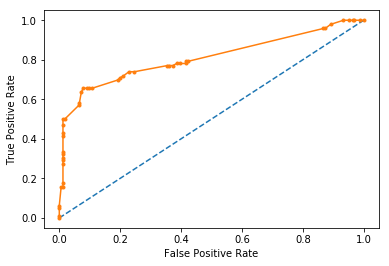

In [147]:
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.savefig('figures/roc.eps')